# This code calculate how much parameter is used for OS-design
# the number of parameter is calculated by this function:

calcualte_total_number_of_parameter_for_prime_number(Prime_list, N)

# you could scroll down to see the image result

In [1]:
import numpy as np

def get_Prime_number_in_a_range(start, end):
    Prime_list = []
    for val in range(start, end + 1): 
        prime_or_not = True
        for n in range(2, val):
            if (val % n) == 0:
                prime_or_not = False
                break
        if prime_or_not:
            Prime_list.append(val)
    return Prime_list

def calcualte_total_number_of_parameter_for_prime_number(Prime_list, N):
    # this part is for speed up calculation
    # for instance if the prime list is [1, 2, 3, 5, 7]
    # The even number we want to get is [2, 4, 6, 8, 10] (with 1 and 2 in the third layer, it will be any integer)
    # to obtain [2, 4, 6, 8, 10] we need 1+1=2, 1+3=4 1+5=6 1+7=8 3+7=10
    # for the reason that the channel number is min(a,b)
    # the channel number for (3+7=10) should be 3 channle for kernel of size 3 and 1 for kenel of size 7
    # the calculation result should be 
    #    first layer = 1+2+3+5+7
    #    second layer = 1+2+3+5+7
    #    extar channel for 3*(3-1) # -1 is because the first layer has one channel  
    # "1.2_from" this kind of model size increase is about 1.2
    #    result = first layer + second layer + extra channle = 18+18+6 = 42
    Prime_list = np.asarray(Prime_list)
    Prime_list_row =np.expand_dims(Prime_list, axis=0)
    Prime_list_column =np.expand_dims(Prime_list, axis=1)
    all_sum_result = Prime_list_row + Prime_list_column

    #list_1 = np.asarray([(i+1)*2 for i in range(int((Prime_list[-1]+1)/2))])
    list_1 = np.asarray([(i+1)*2 for i in range(int(N/2))])
    #print(list_1)
    number_of_parameter = sum(Prime_list)*2

    for i in range(len(Prime_list)):
        list_2 = all_sum_result[i]
        common_element = np.intersect1d(list_1,list_2)
        if len(common_element)!=0:
            number_of_parameter = number_of_parameter+Prime_list[i]*(Prime_list[i]-1)*len(common_element)
            #print(Prime_list[i],end='\t')
        list_1 = np.setdiff1d(list_1,common_element)
        if len(list_1)==0:
            break
    return number_of_parameter

def calculate_total_number_of_parameter_for_using_all_sizes_of_kernel(N):
    purally_using_kernel = (N*(1+N))*0.5
    return purally_using_kernel

In [2]:
# check the function calcualte_total_number_of_parameter_for_prime_number is correct
print(calcualte_total_number_of_parameter_for_prime_number([1,2,3,5,7],10))

42


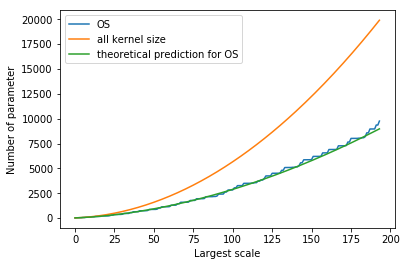

In [4]:
import matplotlib.pyplot as plt

OS_CNN_parameter_number_list = []
single_scale_parameter_number_list = []
perdict_1_list =[]
perdict_list = []

for i in range(6,200):
    largest_length_of_kernels = i
    Prime_list = get_Prime_number_in_a_range(1,largest_length_of_kernels)
    #print(Prime_list)
    OS = calcualte_total_number_of_parameter_for_prime_number(Prime_list,largest_length_of_kernels)
    single = calculate_total_number_of_parameter_for_using_all_sizes_of_kernel(largest_length_of_kernels)
    
    OS_CNN_parameter_number_list.append(OS)
    single_scale_parameter_number_list.append(single)
    perdict_list.append(1.2*i*i/(np.log(i)))  #1.2 comes from here: Search "1.2_from" in this page 
    perdict_1_list.append((1+i)*i/2)
    
fig= plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(OS_CNN_parameter_number_list,label='OS')
ax.plot(single_scale_parameter_number_list,label='all kernel size')
ax.plot(perdict_list,label='theoretical prediction for OS')
#ax.plot(perdict_1_list,label='theoretical predict for single kernel')

ax.set_ylabel('Number of parameter')
ax.set_xlabel('Largest scale')
ax.legend()
fig.show()
path = './model_size_compare.pdf'
fig.savefig(path,bbox_inches = 'tight')